<a href="https://colab.research.google.com/github/f0ng33621/Mock-Exam/blob/main/Online_Answer_Sheet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #เป็นการเรียกใช้ Function ของ python ที่ชื่อ Pandas
import matplotlib.pyplot as plt
import datetime
import csv 
from datetime import datetime, timezone, timedelta
from csv import writer
from csv import reader
tz = timezone(timedelta(hours = 7)) #กำหนดค่า timezone ให้เป็นของประเทศไทย
time = datetime.now(tz=tz) #กำหนด timezone โดยดึงจากบรรทัดที่ 5
time = time.strftime("%c%7z")

# หากท่านยังไม่มีไฟล์ HISTORY.csv **ให้กดลิ้งค์ต่อไปนี้** https://drive.google.com/file/d/1Xq2ec-RLERKgTPq1W9qtjHnRBodjvhO0/view?usp=sharing
หลังจากกดเข้าไปท่านจะเห็นหน้าไฟล์ ให้ไปที่แถบด้านขวาบนจะเจอปุ่ม Add Shortcut to drive ให้กดลงไปและเลือกไปที่ My drive หลังจากนั้นให้กด Add Shortcut ท่านจะได้ไฟล์เป็นที่เรียบร้อยและสามารถสั่ง RUN โปรแกรมส่วนที่เหลือได้ทันที

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/HISTORY.csv"
df = pd.read_csv(path, names = ['TestNo','D/M/Y','Username','Subject','Score','Percentage','ข้อที่ผิด'])

Mounted at /content/drive


In [ ]:
#df = pd.read_csv("HISTORY.csv") #ไปดึง Pandas ที่เป็นคำสั่ง read file csv แล้วเราก็แปะไฟล์ไว้แล้ว
df #Show ให้เช็คความถูกต้องของข้อมูลก่อน

,TestNo,D/M/Y,Username,Subject,Score,Percentage,ข้อที่ผิด
0,None,None,None,None,None,None,None
1,3,Wed Feb 16 12:17:19 2022,F0ng,Eng,12,48,"[6, 8, 9, 10, 11, 13, 16, 17, 20, 21, 22, 23, 25]"
2,3,Wed Feb 16 12:17:19 2022,fong,Eng,18,72,"[18, 19, 20, 21, 23, 24, 25]"
3,3,Thu Feb 17 19:26:43 2022,BEiBEI,Eng,18,72,"[18, 19, 20, 21, 22, 23, 25]"
4,TEST3,Fri Feb 18 23:02:48 2022,praweenwat,Eng,15,60,"[16, 17, 18, 19, 20, 21, 22, 23, 24, 25]"
5,TEST3,Sat Feb 26 14:35:09 2022,para,Eng,10,40.0,"[9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22..."


PART INPUT

In [ ]:
while True :
  Username = str(input('ใส่ชื่อของท่านหรือสิ่งที่สามารถแสดงตัวตนของท่านได้ : '))
  Book_Name = str(input("กรุณาใส่ชื่อหนังสือที่ต้องการทำแบบทดสอบ : "))
  Book_Name = Book_Name.upper().replace(" ","") #error 500 = ERROR500 จัดข้อมูลให้ง่ายต่อการใช้งาน
  
  if Book_Name == "ERROR500":
    print("คุณได้เลือก : ERROR 500")
    Subject = 'Eng'
    Book_Page = str(input("กรุณาใส่ชุดหรือหน้าที่ต้องการทำแบบทดสอบ : "))
    Book_Page = Book_Page.upper().replace(" ","")
    Book_Page_Data = ('3','TEST3','ชุดที่3') #ตั้งเป็น Tuple ข้อมูลไว้
    if Book_Page in Book_Page_Data : #เช็คว่า Bookpage มีอยู่ใน Bookpagedata หรือเปล่า
      Count = 1
      UserAns = [] #LIST
      BookAns = () #TUPLE เดี๋ยวมาเปลี่ยนเป็น Dict ?!!!
      while Count <= 25 :
        RawAns = str(input('ข้อที่'+str(Count)+' คำตอบของท่าน : '))
        RawAns = RawAns.upper()
        UserAns.append(RawAns)
        Count += 1
    else:
      print("ไม่พบข้อมูลชุดหรือหน้าที่คุณต้องการทำ")
    break
  
  elif Book_Name == "VOCAB1000":
    print("คุณได้เลือก : VOCAB 1000")
    Subject = 'Eng'
    Book_Page = str(input("กรุณาใส่ชุดหรือหน้าที่ต้องการทำแบบทดสอบ : "))
    Book_Page = Book_Page.upper().replace(" ","")
    Book_Page_Data = ('3','TEST3','ชุดที่3')
    if Book_Page in Book_Page_Data :
      Count = 1
      UserAns = []
      BookAns = () 
      while Count <= 25 :
        RawAns = str(input('ข้อที่'+str(Count)+' คำตอบของท่าน : '))
        RawAns = RawAns.upper()
        UserAns.append(RawAns)
        Count += 1
    else:
      print("ไม่พบข้อมูลชุดหรือหน้าที่คุณต้องการทำ")
    break
        
  else:
    print('ไม่พบข้อมูลหนังสือ กรุณาใส่ใหม่อีกครั้ง')

PART CHECK SCORE

In [ ]:
BookAns = ('A', 'B', 'C', 'C', 'C', 'A', 'A', 'C', 'D', 'C', 'D', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'A', 'A', 'C') #TUPLE
Count_Check = 0
Total_Check = 0
WrongAns_Check = [] # Output ข้อที่ผิดตามปกติ

while Count_Check <= (len(UserAns)-1):  
  if UserAns[Count_Check] == BookAns[Count_Check]: # เข้าถึงข้อมูลใน list ผ่านตัวเลขที่มาจาก Count_Check
    Total_Check += 1
  else:
    WrongAns_Check.append(Count_Check+1) #+1 เพื่อให้กลับมานับตามปกติ จาก 0 ตามแบบของ list
  Count_Check += 1

print ("คะแนนที่คุณได้ :",Total_Check,"/ 25")
Percentage = (Total_Check/25)*100
print ("คิดเป็น % ได้ :",Percentage,"%")
print ("ข้อที่ทำผิดมีดังนี้ :",WrongAns_Check)

คะแนนที่คุณได้ : 10 / 25
คิดเป็น % ได้ : 40.0 %
ข้อที่ทำผิดมีดังนี้ : [9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/HISTORY.csv'

with open(path, 'a', encoding = 'utf-8-sig',newline="") as file:
  writer = csv.writer(file)
  writer.writerow([Book_Page,time,Username,Subject,Total_Check,Percentage,WrongAns_Check])

file.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/HISTORY.csv"
df = pd.read_csv(path, names = ['TestNo','D/M/Y','Username','Subject','Score','Percentage','ข้อที่ผิด'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# หากท่านยังไม่มีไฟล์ Writerinput_Error500.csv **ให้กดลิ้งค์ต่อไปนี้** https://drive.google.com/file/d/1BGgiUYKF0VczjVTAs5-hWCcXTtKMRBlH/view?usp=sharing
หลังจากกดเข้าไปท่านจะเห็นหน้าไฟล์ ให้ไปที่แถบด้านขวาบนจะเจอปุ่ม Add Shortcut to drive ให้กดลงไปและเลือกไปที่ My drive หลังจากนั้นให้กด Add Shortcut ท่านจะได้ไฟล์เป็นที่เรียบร้อยและสามารถสั่ง RUN โปรแกรมส่วนที่เหลือได้ทันที

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

path = "/content/drive/My Drive/Writerinput_Error500.csv" #ต้องโหลดลง drive ตัวเองก่อน
Writerinput = pd.read_csv(path)
Writerinput.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(25, 1)

In [ ]:
#Writerinput

In [ ]:
df

,TestNo,D/M/Y,Username,Subject,Score,Percentage,ข้อที่ผิด
0,None,None,None,None,None,None,None
1,3,Wed Feb 16 12:17:19 2022,F0ng,Eng,12,48,"[6, 8, 9, 10, 11, 13, 16, 17, 20, 21, 22, 23, 25]"
2,3,Wed Feb 16 12:17:19 2022,fong,Eng,18,72,"[18, 19, 20, 21, 23, 24, 25]"
3,3,Thu Feb 17 19:26:43 2022,BEiBEI,Eng,18,72,"[18, 19, 20, 21, 22, 23, 25]"
4,TEST3,Fri Feb 18 23:02:48 2022,praweenwat,Eng,15,60,"[16, 17, 18, 19, 20, 21, 22, 23, 24, 25]"
5,TEST3,Sat Feb 26 14:35:09 2022,para,Eng,10,40.0,"[9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22..."


In [ ]:
Row_Want = int(input('กรุณาเลือกครั้งการทำที่คุณต้องการเข้าชม : '))

print(df.iloc[Row_Want])

while True :
  User_Confuse = input('กรุณาใส่ข้อที่ท่านต้องการ (หากต้องการหยุดการทำงานพิมพ์ End): ')
  User_Confuse = User_Confuse.upper().replace(" ","")
  if User_Confuse == 'END':
    print ('โปรแกรมสิ้นสุดการทำงานแล้ว')    
    break
    
  else:
    User_Confuse = int(User_Confuse)
    User_Confuse = User_Confuse - 1
    print(Writerinput.iloc[User_Confuse]) #จัด format

TestNo                                           TEST3
D/M/Y                         Fri Feb 18 23:02:48 2022
Username                                    praweenwat
Subject                                            Eng
Score                                               15
Percentage                                          60
ข้อที่ผิด     [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Name: 4, dtype: object
                                                เฉลย
0  ตอบข้อ : A  วัดเรื่อง : noun  รายละเอียด : แก้...
                                                เฉลย
0  ตอบข้อ : A  วัดเรื่อง : noun  รายละเอียด : แก้...


In [ ]:
# Book_Type = str(input("กรุณาใส่หมวดหมู่หรือวิชาที่คุณต้องการเข้าชม : "))
# Book_Type = Book_Type.capitalize().replace(" ","")


# if Book_Type == 'เอาเทียบกับ df subject': #เอาเฉพาะคำว่า 'Eng'
#   print("คุณได้เลือกหมวดหมู่ : Eng")
#   Book_Name_Check = str(input("กรุณาใส่ชื่อหนังสือที่คุณต้องการเข้าชม : "))
#   Book_Name_Check = Book_Name_Check.upper().replace(" ","")
    
#   if Book_Name_Check == 'ERROR500':
#     print("คุณได้เลือก : ERROR 500")
#     Book_Page_Check = str(input("กรุณาใส่ชื่อชุดหรือหน้าที่คุณต้องการเข้าชม : "))
#     Book_Page_Check = Book_Page_Check.upper().replace(" ","")
#     Book_Page_Data = ('3','TEST3','ชุดที่3')

In [ ]:
# # History หมวด/หนังสือ/ชุดที่(หน้า)/ครั้งที่ในการทำ/score+date/ดูข้อผิด(รายละเอียดบทที่ผิด)
# #         Accurancy(เลือกตาม  1.หมวดเช่น Eng 2.หนังสือเช่น Error500 3.ชุดที่(หน้า)เช่น ชุดที่1 ทำไปแล้ว 2 ครั้งแยกครั้งให้ดูเทียบกัน) 
# #                   กดดู Accurancy ส่วนที่ผิด (Link หาดูข้อที่ผิดของบรรทัดที่ 1)

# Book_Type = str(input("กรุณาใส่หมวดหมู่หรือวิชาที่คุณต้องการเข้าชม : "))
# Book_Type = Book_Type.upper().replace(" ","")

# if Book_Type == 'ENG':
#   print("คุณได้เลือกหมวดหมู่ : ENG")
#   Book_Name_Check = str(input("กรุณาใส่ชื่อหนังสือที่คุณต้องการเข้าชม : "))
#   Book_Name_Check = Book_Name_Check.upper().replace(" ","")
  
#   if Book_Name_Check == 'ERROR500':
#     print("คุณได้เลือก : ERROR 500")
#     Book_Page_Check = str(input("กรุณาใส่ชื่อชุดหรือหน้าที่คุณต้องการเข้าชม : "))
#     Book_Page_Check = Book_Page_Check.upper().replace(" ","")
#     Book_Page_Data = ('3','TEST3','ชุดที่3')
    
#     if Book_Page_Check in Book_Page_Data :
#       No = 1 # *** สมมติไว้เฉยๆ ว่าเป็นข้อมูลชุดแรก เพื่อลอง run แต่จริงๆตัวนี้จะเป็นตัวที่ import จำนวนครั้งที่ได้ทำ STEP 1 *** !!!
#       print("คุณได้ทำ TEST 3 ไปแล้ว",No,"ครั้ง") # *** N ติดไว้ แทนจำนวนครั้งที่ได้ทำ STEP 1 *** / ข้อมูลของ STEP 2 !!!

#       if No > 1:
#         Book_round = str(input("กรุณาเลือกครั้งการทำที่คุณต้องการเข้าชม : "))
#       elif No == 1:
#         print ("เวลาที่ทำคือ","Time_Date") # Time_Date ติดไว้ แทนเวลาที่ได้ทำ STEP 1 ในครั้งนั้นๆ !!!
#         print ("คะแนนที่คุณได้ :",Total_Check,"/ 25")
#         print ("ข้อที่ทำผิดมีดังนี้ :",WrongAns_Check)
#         while True :
#           Choice_Check = int(input("กรุณาเลือกข้อที่ต้องการดูเฉลย : "))
#เปลี่ยนใหม่           if UserAns[Choice_Check-1] == BookAns[Choice_Check-1]: # -1 เพื่อให้แปลงเป็นตัวนับแบบ เริ่มที่ 0
#             print("ข้อที่",Choice_Check,"คุณตอบ",UserAns[Choice_Check-1],"เป็นคำตอบที่ ถูกต้อง")
#           else:
#             print("ข้อที่",Choice_Check,"คุณตอบ",UserAns[Choice_Check-1],"เป็นคำตอบที่ ผิด")
#           print("***Data ของ Choice_Check-1***") # *** ติด data ของข้อที่ Choice_Check-1 ไว้ รอ import จากรายละเอียดหนังสือ *** !!!
          
#           Stop_Or_Not = str(input("ต้องการดูเฉลยข้ออื่นๆ ใช่หรือไม่ : "))
#           Stop_Or_Not = Stop_Or_Not.upper().replace(" ","")
#           Continue_Data = ('ใช่','YES')
#           Stop_Data = ('ไม่','NO')
#           if Stop_Or_Not in Continue_Data:
#             print("ไปลุยกันต่อเลย!")
#           elif Stop_Or_Not in Stop_Data:
#             print("ไว้เจอกันใหม่น้า!")
#             break
#           else:
#             print("คำขอผิดพลาด")

#       else:
#         print("ไม่พบข้อมูลครั้งการทำที่คุณต้องการเข้าชม")
#     else:
#       print("ไม่พบข้อมูลชุดหรือหน้าที่คุณต้องการเข้าชม")
#   else:
#     print('ไม่พบข้อมูลหนังสือที่คุณต้องการเข้าชม')
# else:
#   print('ไม่พบข้อมูลหมวดหมู่หรือวิชาที่คุณต้องการเข้าชม')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


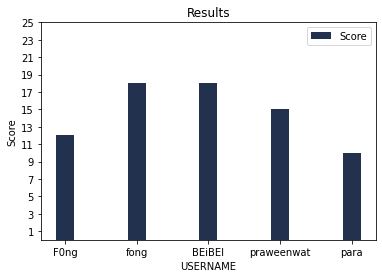

In [ ]:
import itertools
import matplotlib.transforms as mtransforms
import numpy as np

drive.mount('/content/drive') 
path = '/content/drive/My Drive/HISTORY.csv'

x = []
y = []
  
with open(path,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')

    for row in plots: #ให้ row แทนในบรรทัดของไฟล์ csv ถ้าหมดแล้วก็หยุด 
        x.append(str(row[2])) #เพิ่มคอลัมน์ 2 เข้าไปในลิสต์และเก็บค่าเป็น str
        y.append(str(row[4])) # เหมือนกัน แต่เป็นตัวคะแนนเก็บเป็น str ไปใส่ในลิสต์
x = x
x.pop(0) #ลบค่าตำแหน่งที่ 0 ออกไป <--มันจะเป็น NONE พอดี
y = y #กำหนดตัวแปรอีกครั้ง
y.pop(0) #ลบค่าตำแหน่งที่ 0 ออกไป
y = list(map(int, y)) #เป็นคำสั่งที่ทำให้เปลี่ยนตัวข้อมูลใน ลิสต์เป็น int
plt.bar(x, y, color = '#22314e',width = 0.25 , label = "Score")
plt.xlabel('USERNAME')
plt.ylabel('Score')
plt.title('Results')
plt.yticks(range(1,27,2)) #กำหนดความถี่ของแถบ score ว่าได้กี่คะแนน
plt.legend()
plt.show()

# มันจะเพิ่มต่อตูดตามที่ทำมา ซึ่ง ถ้าคะแนนไม่เท่า ยังไงเสียมันก็จะบวก 1 หน่วย

In [ ]:
import os
path = os.getcwd()
print (path)
filelist = str(os.listdir(path))
print (filelist)
#FOR TEST ONLY NA KRUB

/content
['.config', 'drive', 'sample_data']


In [ ]:
# บอก user ว่าข้อนั้นเป็นเรื่องเกี่ยวกับอะไร
# Categories = {'1':'Noun','2':'Preposition','3':'Pronoun','4':'Parallel structure','5':'Verb',
#               '6':'Preposition','7':'Verb','8':'Word choice','9':'Adjective','10':'Adverb','11':'Verb',
#               '12':'Adverb clause','13':'Noun','14':'Parallel structure','15':'Noun','16':'Word form',
#               '17':'Word order','18':'Word choice','19':'Word choice','20':'Verb','21':'Verb','22':'Parallel structure',
#               '23':'Word form','24':'Noun','25':'Verb'}
# while True:
#   User_Want = input('ใส่ข้อที่คุณต้องการรู้หมวดหมู่ : ')
#   if User_Want != 'end' :
#    print (Categories.get(str(User_Want)))
#   elif User_Want == 'end':
#     break   #止まれ หยุดการทำงานของรูป
#   else:
#     True

In [ ]:
# #ให้ดึงข้อมูลจาก list wrong_ans เพื่อแสดงผลออกมาว่าข้อที่ผิดนั้นเป็นเนื้อหาเรือ่งใด
# count_Wrong_Ans = 0 #ตั้งไว้นับใน loop
# WRS_key = '0' #จริงๆต้องการให้ไม่มีค่าแต่กลัวใส่ None แล้วจะมีปัญหา
# Categories = {'1':'Noun','2':'Preposition','3':'Pronoun','4':'Parallel structure','5':'Verb',
#               '6':'Preposition','7':'Verb','8':'Word choice','9':'Adjective','10':'Adverb','11':'Verb',
#               '12':'Adverb clause','13':'Noun','14':'Parallel structure','15':'Noun','16':'Word form',
#               '17':'Word order','18':'Word choice','19':'Word choice','20':'Verb','21':'Verb','22':'Parallel structure',
#               '23':'Word form','24':'Noun','25':'Verb'}
# while count_Wrong_Ans < (len[WrongAns_Check]) :
#   WrongAns_Check[count_Wrong_Ans] = WRS_key
#   WRS_key = str(WRS_key)
#   print (Categories.get(str(WRS_key)))
#   count_Wrong_Ans += 1

# print ("จบการทำงานของฟังก์ชั่นนี้")

In [ ]:
# # เป้าหมาย 

# Discord = ('วันใดที่คุณล้มแสดงว่าคุณลื่น','') #ใส่คำพูดแรงจูงใจลงไปฝากเพิ่มด้วยนะคับ
# Target = str(input('เลือกหัวข้อที่ต้องการ : '))
# if Target == '':
#   print ('คุณได้เลือก ')
# elif Target == "":
#   print ('คุณได้เลือก')
# else:
#   print ('ไม่มีข้อมูลที่ท่านต้องการหา')